<a href="https://colab.research.google.com/github/VictoriaPedrozaAI/NLP/blob/main/Attention_Mechanism_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


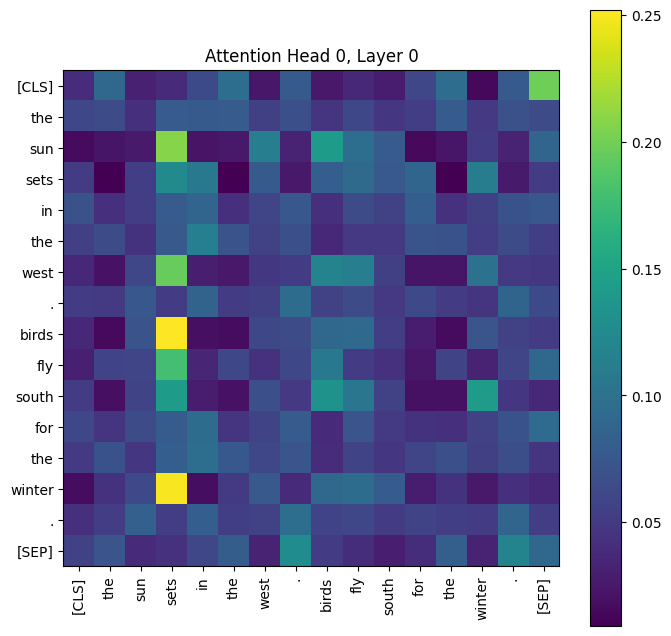

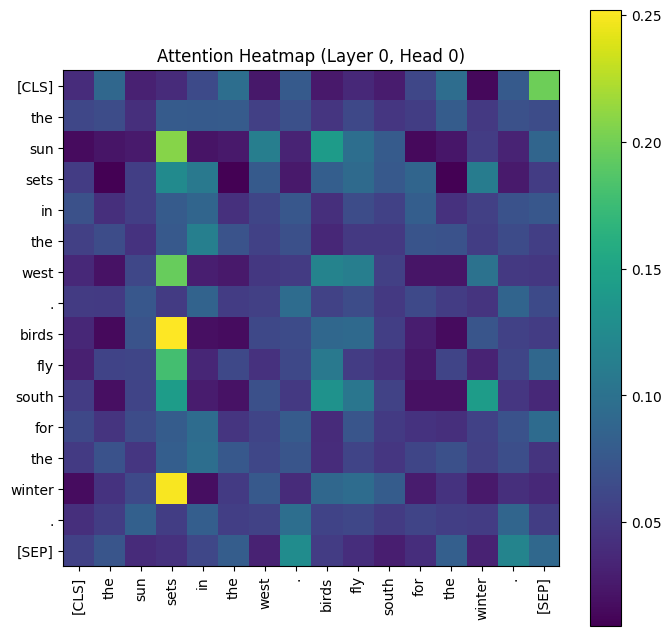


Top 3 attended tokens per input token (Layer 0, Head 0):
     [CLS] attends to:
   → [SEP]      (score: 0.20)
   → the        (score: 0.10)
   → the        (score: 0.10)
       the attends to:
   → the        (score: 0.08)
   → sets       (score: 0.08)
   → the        (score: 0.08)
       sun attends to:
   → sets       (score: 0.21)
   → birds      (score: 0.14)
   → west       (score: 0.11)
      sets attends to:
   → sets       (score: 0.13)
   → winter     (score: 0.11)
   → in         (score: 0.11)
        in attends to:
   → in         (score: 0.09)
   → for        (score: 0.08)
   → sets       (score: 0.08)
       the attends to:
   → in         (score: 0.11)
   → sets       (score: 0.08)
   → for        (score: 0.07)
      west attends to:
   → sets       (score: 0.20)
   → birds      (score: 0.12)
   → fly        (score: 0.11)
         . attends to:
   → .          (score: 0.09)
   → .          (score: 0.09)
   → in         (score: 0.09)
     birds attends to:
   → sets      

In [1]:
from transformers import BertTokenizer, BertModel
import torch
import matplotlib.pyplot as plt

model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name, output_attentions=True)

text = "The sun sets in the west. Birds fly south for the winter."
inputs = tokenizer(text, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)
    attentions = outputs.attentions

layer = 0
head = 0
attention = attentions[layer][0, head].numpy()

tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
plt.figure(figsize=(8, 8))
plt.imshow(attention, cmap='viridis')
plt.xticks(range(len(tokens)), tokens, rotation=90)
plt.yticks(range(len(tokens)), tokens)
plt.title(f"Attention Head {head}, Layer {layer}")
plt.colorbar()
plt.show()



from transformers import BertTokenizer, BertModel
import torch
import matplotlib.pyplot as plt
import numpy as np


model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name, output_attentions=True)

text = "The sun sets in the west. Birds fly south for the winter."
inputs = tokenizer(text, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)
    attentions = outputs.attentions

layer = 0
head = 0
attention_matrix = attentions[layer][0, head].numpy()
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

plt.figure(figsize=(8, 8))
plt.imshow(attention_matrix, cmap='viridis')
plt.xticks(range(len(tokens)), tokens, rotation=90)
plt.yticks(range(len(tokens)), tokens)
plt.title(f"Attention Heatmap (Layer {layer}, Head {head})")
plt.colorbar()
plt.show()

#The values will go down when the text is bigger because gives equal weight to all...
print("\nTop 3 attended tokens per input token (Layer 0, Head 0):")
for i, token in enumerate(tokens):
    attention_row = attention_matrix[i]
    top_indices = attention_row.argsort()[-3:][::-1]
    top_tokens = [(tokens[j], attention_row[j]) for j in top_indices]
    print(f"{token:>10} attends to:")
    for t, score in top_tokens:
        print(f"   → {t:<10} (score: {score:.2f})")